In [1]:
import yfinance as yf

stock = "TATASTEEL.NS"

data = yf.download(stock, start="2022-01-01", end="2025-01-01")

print(data.head())


/tmp/ipython-input-4085187028.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker     TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS
Date                                                                       
2022-01-03   100.551888   101.304406    98.135894    98.135894     38658030
2022-01-04   101.110771   102.070130   100.028200   101.480436     59757310
2022-01-05   103.645592   103.927237   100.446272   100.952351     61861760
2022-01-06   102.382576   104.120863   101.704869   103.152701     53354000
2022-01-07   102.127342   103.328735   101.027164   102.554205     39738570


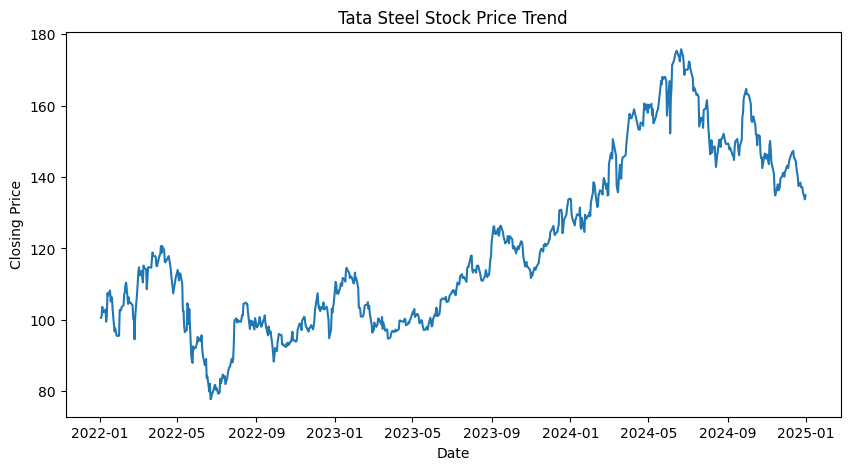

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Tata Steel Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


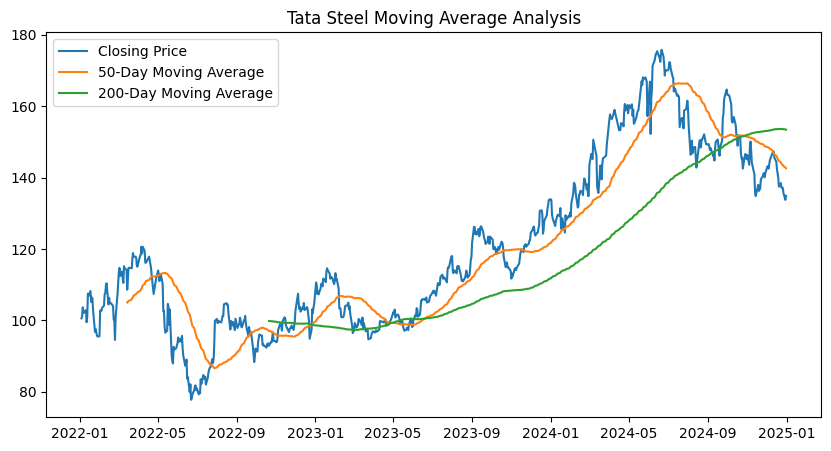

In [4]:
data["MA50"] = data['Close'].rolling(50).mean()
data["MA200"] = data['Close'].rolling(200).mean()

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label="Closing Price")
plt.plot(data['MA50'], label="50-Day Moving Average")
plt.plot(data['MA200'], label="200-Day Moving Average")
plt.legend()
plt.title("Tata Steel Moving Average Analysis")
plt.show()



In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Use closing prices
close_prices = data['Close'].dropna()

# Build ARIMA model (simple one)
model = ARIMA(close_prices, order=(2,1,2))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

739    135.046063
740    135.113694
741    135.215604
742    135.253592
743    135.328263
744    135.346972
745    135.403061
746    135.409363
747    135.452663
748    135.451105
749    135.485501
750    135.479085
751    135.507188
752    135.497888
753    135.521462
754    135.510570
755    135.530811
756    135.519166
757    135.536890
758    135.525030
759    135.540802
760    135.529067
761    135.543280
762    135.531878
763    135.544810
764    135.533865
765    135.545718
766    135.535296
767    135.546219
768    135.536349
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


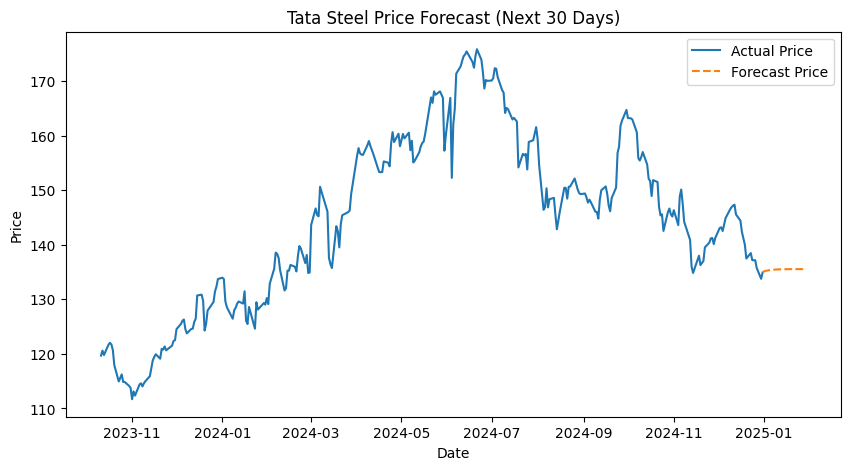

In [7]:
import pandas as pd

# Create future date index
future_dates = pd.date_range(start=close_prices.index[-1], periods=30, freq="D")

forecast_series = pd.Series(forecast.values, index=future_dates)

plt.figure(figsize=(10,5))
plt.plot(close_prices.tail(300), label="Actual Price")   # show last 300 days only
plt.plot(forecast_series, label="Forecast Price", linestyle="dashed")
plt.title("Tata Steel Price Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


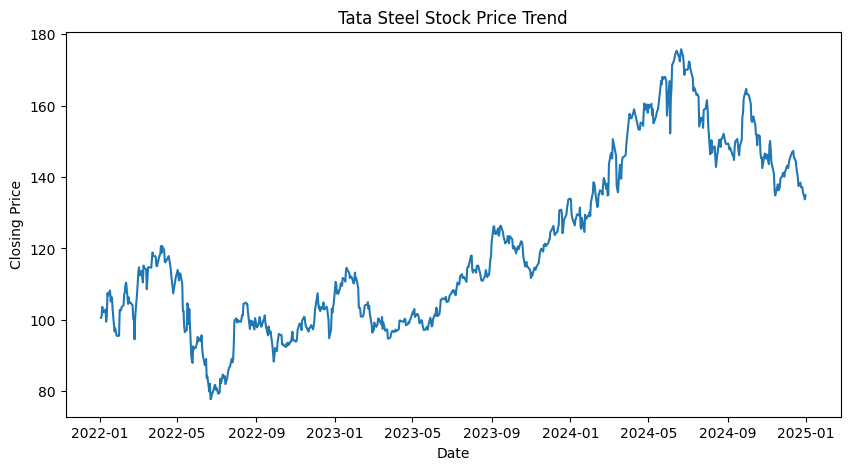

In [9]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Tata Steel Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.savefig("tatasteel_trend.png")   # SAVE HERE
plt.show()


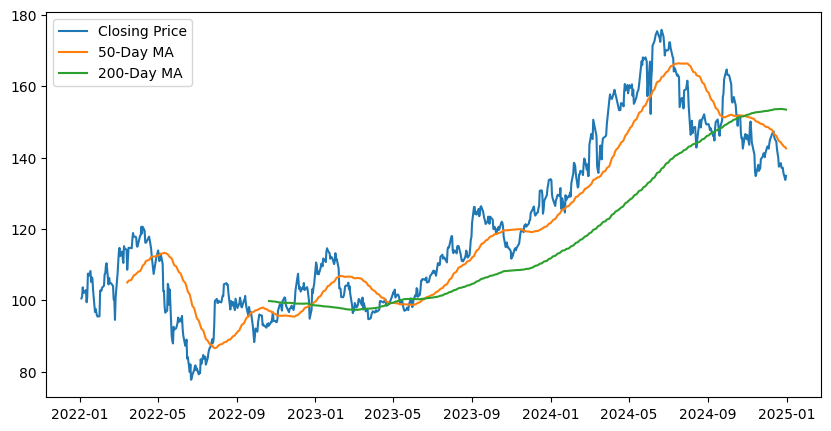

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label="Closing Price")
plt.plot(data['MA50'], label="50-Day MA")
plt.plot(data['MA200'], label="200-Day MA")
plt.legend()

plt.savefig("tatasteel_moving_average.png")
plt.show()


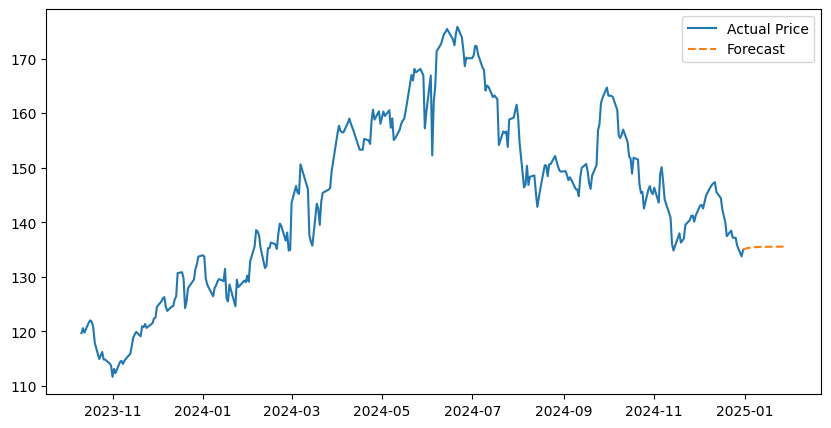

In [11]:
plt.figure(figsize=(10,5))
plt.plot(close_prices.tail(300), label="Actual Price")
plt.plot(forecast_series, label="Forecast", linestyle="dashed")
plt.legend()

plt.savefig("tatasteel_forecast.png")
plt.show()


nsights

Tata Steel’s stock price shows noticeable ups and downs, reflecting market reactions and changing conditions over time.

The 50-day moving average highlights short-term price behaviour, while the 200-day moving average helps in understanding the broader, long-term trend.

The forecasting model gives a basic statistical outlook of how prices may move ahead, helping to understand possible future direction based on past data.